## Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sb

### Reading the data and storing it in a variable

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fetching columns of the dataset

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
sb.set()

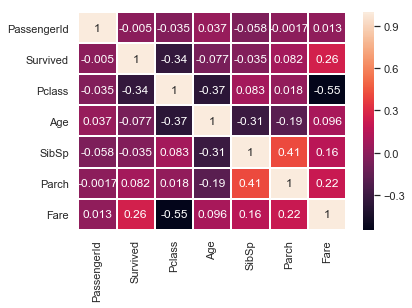

In [7]:
sb.heatmap(data.corr(), annot=True, linewidth = 1, linecolor='w')

In [8]:
data.shape

(891, 12)

In [9]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
class_survival = data.groupby('Pclass')['Survived'].value_counts()

In [11]:
class_survival

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

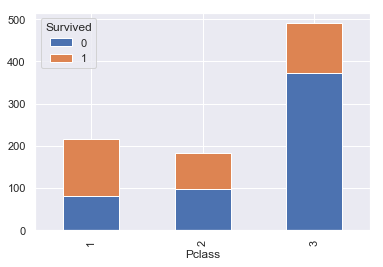

In [12]:
class_survival.unstack().plot(kind='bar', stacked=True)

## Using crossby in Pclass vs survival 

In [13]:
pclass_data = pd.crosstab(data['Pclass'], data['Survived'])

In [14]:
pclass_data

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


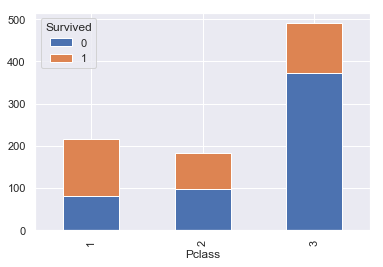

In [15]:
pclass_data.plot(kind = 'bar', stacked=True)

In [16]:
pclass_data['total'] = pclass_data.sum(axis=1)

In [17]:
pclass_data = pclass_data.apply(lambda x: round(100*x/pclass_data['total']))

In [18]:
pclass_data

Survived,0,1,total
Pclass,,,
1,37.0,63.0,100.0
2,53.0,47.0,100.0
3,76.0,24.0,100.0


In [19]:
pclass_data.drop('total', axis=1, inplace=True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

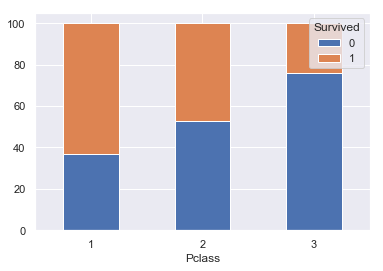

In [20]:
pclass_data.plot(kind='bar', stacked=True)
mpt.xticks(rotation=0)

## Predicting data

In [21]:
training_data = data[['PassengerId', 'Pclass', 'Fare']]

In [22]:
output_data = data['Survived']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X, x_text, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42) 
#X,Y are training i/p and o/p and x,y are evaluating i/p o/p
#test_size is 30%, meaning 70trainig, 30 test,can be 80-20, but not half
#random is shuffle values

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X,Y)                    #fit means training

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
predictions = model.predict(x_text)

In [29]:
predictions[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
confusion_matrix(predictions, y_test)               

array([[134,  58],
       [ 23,  53]], dtype=int64)

In [32]:
#the above cell implies that 134 and 53 predictions are correct rest are wrong

In [33]:
score = accuracy_score(predictions, y_test)
score                                               #this means approx 70% of the predicyions are correct

0.6977611940298507

## Converting gender options into boolean

In [34]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [35]:
def bool_converter(x):
    if(x=='male'):
        return 0
    else:
        return 1


In [42]:
data['Gender'] = data['Sex'].apply(bool_converter)

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [44]:
data.drop('gender', axis=1, inplace=True)

In [46]:
data[['Sex', 'Gender']].head()

,Sex,Gender
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [47]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender'],
      dtype='object')

## Predicting chances of survival on the basis of gender of the person

In [49]:
training_data2 = data[['PassengerId', 'Pclass', 'Fare', 'Gender']]

In [50]:
output_data2 = data['Survived']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X, x_test, Y, y_test = train_test_split(training_data2, output_data2, test_size=0.3, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model2 = LogisticRegression()

In [57]:
model2.fit(X,Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
predictions2 = model2.predict(x_test)

In [61]:
predictions2[:15]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [63]:
confusion_matrix(predictions2, y_test)

array([[134,  33],
       [ 23,  78]], dtype=int64)

In [65]:
score = accuracy_score(predictions2, y_test)

In [66]:
score

0.7910447761194029